<a href="https://colab.research.google.com/github/fabien-touchard/formationIA/blob/main/Exercice_Data_analysis_using_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ce code effectue diverses tâches d'analyse et de visualisation de données à l'aide de Pandas, vous aidant à explorer et à comprendre les données du fichier 'db.csv'.

# Comment importer la librairie pandas et lire un fichier CSV db dans un DataFrame pandas ?

In [50]:
import pandas as pd

df = pd.read_csv('db.csv')

# Renvoyer les dimensions du DataFrame 'df', qui indiquent le nombre de lignes et de colonnes du DataFrame :

In [51]:
df.shape

(20, 5)

# Renvoyer les noms de colonnes (en-tête) du DataFrame 'df' :

In [52]:
df.columns

Index(['Occupation', 'Category', 'All_weekly', 'M_weekly', 'F_weekly'], dtype='object')

`.columns` est une commande spéciale dans Pandas qui est utilisée pour accéder aux noms des colonnes.

# Récupérer la colonne 'Category' du DataFrame, compter le nombre d'occurrences de chaque valeur unique, et tracer un graphique à barres horizontales pour visualiser la distribution des catégories :

<Axes: ylabel='Category'>

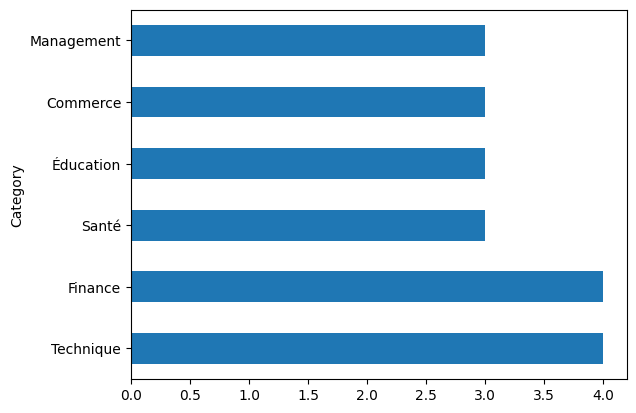

In [53]:
df['Category'].value_counts().plot.barh()

*  `.value_counts()` calcule combien de fois chaque valeur unique apparaît dans la colonne 'Category'. Elle crée une nouvelle Series où les valeurs uniques de 'Category' sont l'index et leurs nombres d'occurrences correspondants sont les valeurs.
*  .plot est une méthode fournie par Pandas pour créer des graphiques.
*  .barh() crée spécifiquement un graphique à barres horizontales.
Il utilise les données du résultat de value_counts() pour générer les barres: chaque valeur unique de 'Category' aura sa propre barre, et la longueur de la barre représentera sa fréquence (combien de fois elle apparaît).

# Générer des statistiques descriptives pour les colonnes numériques du DataFrame 'df', telles que le nombre d'observations, la moyenne, l'écart-type, les valeurs minimale et maximale :

In [54]:
df.describe()

,All_weekly,M_weekly,F_weekly
count,20.000000,20.000000,20.000000
mean,151.500000,78.250000,73.250000
std,32.931348,29.614852,18.372964
min,100.000000,30.000000,40.000000
25%,127.500000,60.000000,58.750000
50%,150.000000,80.000000,75.000000
75%,172.500000,90.000000,82.500000
max,220.000000,150.000000,110.000000


La méthode `.describe()` est un outil pratique dans Pandas qui fournit un aperçu statistique des données numériques de votre DataFrame.

Imaginez que vous ayez un tableau de données avec des informations comme l'âge, le salaire et les années d'expérience. `df.describe()` calculera et affichera rapidement des éléments tels que :

*  **count** : Combien de points de données y a-t-il pour chaque colonne numérique.
*  **mean** : La valeur moyenne de chaque colonne numérique.
*  **std** : La dispersion des données (écart type).
*  **min** : La plus petite valeur de chaque colonne numérique.
*  **25%** : La valeur qui sépare les 25 % inférieurs des données du reste (également appelée premier quartile).
*  **50%** : La valeur médiane des données (également appelée médiane ou deuxième quartile).
*  **75%** : La valeur qui sépare les 75 % inférieurs des données du reste (également appelée troisième quartile).
*  **max** : La plus grande valeur de chaque colonne numérique.

# Convertir les colonnes 'All_weekly', 'M_weekly' et 'F_weekly' en valeurs numériques, en utilisant 'coerce' pour remplacer toutes les valeurs non numériques par NaN :

In [55]:
df.All_weekly = pd.to_numeric(df.All_weekly, errors='coerce')
df.M_weekly = pd.to_numeric(df.M_weekly, errors='coerce')
df.F_weekly = pd.to_numeric(df.F_weekly, errors='coerce')

*  `pd.to_numeric()` effectue la conversion en un type de données numérique.
*  `errors='coerce'` indique à la fonction comment gérer les erreurs pendant le processus de conversion. Dans ce cas, 'coerce' signifie que s'il y a des valeurs dans la colonne 'All_weekly' qui ne peuvent pas être converties en nombres (comme du texte ou des caractères spéciaux), elles seront remplacées par NaN (Not a Number - Pas un Nombre).
Imaginez que vous ayez une colonne dans votre feuille de calcul qui est censée contenir uniquement des nombres, mais que quelqu'un a accidentellement saisi du texte dans quelques cellules. Ce code convertirait les nombres valides en valeurs numériques réelles et remplacerait les entrées de texte incorrectes par NaN, rendant la colonne adaptée aux opérations mathématiques.

In [56]:
df1 = df.dropna()  # Create a new DataFrame 'df1' by removing rows with NaN values
df1.shape

(20, 5)

`dropna()` est conçue pour supprimer les lignes qui contiennent des valeurs manquantes, qui sont représentées par `NaN` dans Pandas.
Elle crée un nouveau DataFrame appelé `df1` et lui affecte le résultat de `df.dropna()`. Cela signifie que `df1` sera une copie de `df` mais sans les lignes contenant `NaN`.

# Créer un nouveau DataFrame 'df1' en supprimant les lignes avec des valeurs manquantes (NaN), puis afficher la forme du DataFrame nettoyé :

In [57]:
df1 = df1.sort_values(by=['F_weekly'], ascending=False)[:15]

*  `sort_values()` est une fonction Pandas utilisée pour trier un DataFrame.
*  `by=['F_weekly']` spécifie que le tri doit être basé sur les valeurs de la colonne 'F_weekly'.
*  `ascending=False` indique que le tri doit être effectué dans l'ordre décroissant, ce qui signifie que les valeurs les plus élevées de la colonne 'F_weekly' seront en haut.

In [58]:
df1.shape

(15, 5)

# Tracer un graphique à barres horizontales pour les colonnes 'F_weekly' et 'M_weekly' dans le DataFrame 'df1' :

<Axes: >

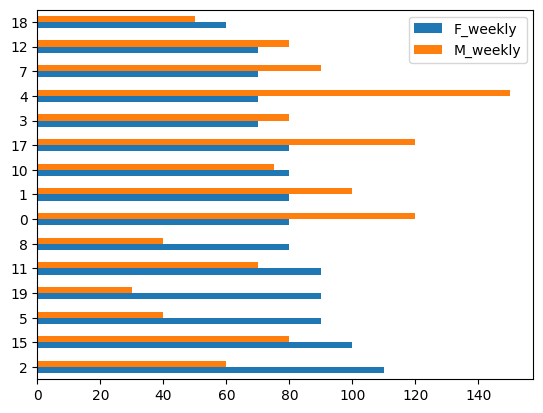

In [59]:
df1[["F_weekly","M_weekly"]].plot(kind="barh")

# Définir la colonne 'Occupation' comme index du DataFrame 'df1' puis tracer un graphique à barres horizontales pour les colonnes 'F_weekly' et 'M_weekly' :

<Axes: ylabel='Occupation'>

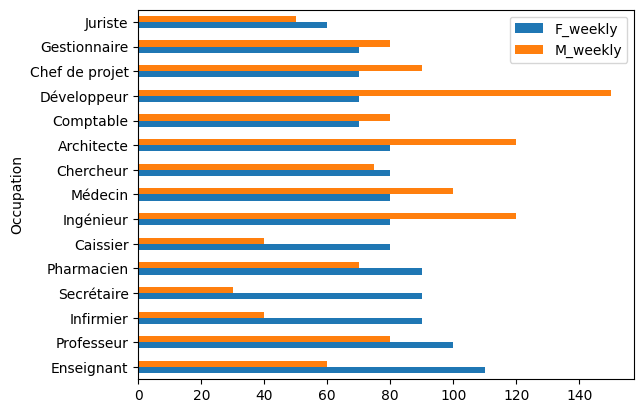

In [60]:
df1=df1.set_index('Occupation')
df1[["F_weekly","M_weekly"]].plot(kind="barh")

La méthode `set_index()` est utilisée pour changer l'index (étiquettes de ligne) du DataFrame.
Elle spécifie `'Occupation'` comme nouvel index. Cela signifie que les valeurs de la colonne « Occupation » seront désormais utilisées pour identifier chaque ligne du DataFrame au lieu de l'index numérique par défaut (0, 1, 2, etc.).

# Calculer la colonne 'Delta' en calculant la différence en pourcentage entre 'M_weekly' et 'F_weekly'. Ensuite, il affiche les noms de colonnes de 'df1' :

In [61]:
df1['Delta']=(df1.M_weekly/df1.F_weekly-1)*100
df1.columns

Index(['Category', 'All_weekly', 'M_weekly', 'F_weekly', 'Delta'], dtype='object')

`df1['Delta']=(df1.M_weekly/df1.F_weekly-1)*100` calcule de combien `M_weekly` est supérieur ou inférieur à `F_weekly` et l'exprime en pourcentage. Si `M_weekly` est supérieur, le pourcentage sera positif ; s'il est inférieur, le pourcentage sera négatif.

## Trier 'df1' en fonction de la colonne 'Delta' dans l'ordre croissant et sélectionner les 15 premières lignes. Enfin, il trace un graphique à barres horizontales pour la colonne 'Delta' :

<Axes: ylabel='Occupation'>

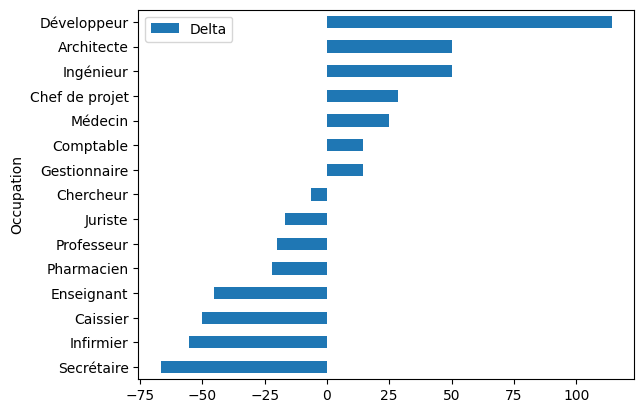

In [62]:
df1=df1.sort_values(by=['Delta'],ascending=True)[:15]
df1.plot.barh(y='Delta')

*  `by=['Delta']` spécifie que le tri doit être effectué en fonction de la colonne `'Delta'`.
*  `ascending=True` signifie que les données seront triées dans l'ordre croissant, de la plus petite valeur `'Delta'` à la plus grande.